In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f_xstar(lij,lpij,luv,muv,mvu,d):
  xstar = np.zeros([m,m,2,1])
  bal = np.zeros([m,m,ne,xp])
  for i in range(3):
      for j in range(3):
        if i!=j :
          for k in range(2):
            for n in range(ne):
              if c_bal[i,j,n,k]==1:
                bal[i,j,n,k]=muv[0,0,n,0]
              elif c_bal[i,j,n,k]==-1:
                bal[i,j,n,k]=-muv[0,0,n,0]
            xstar[i,j,k]=((1)/((lij[i,j] - lpij[i,j,k] + (c[i,j,:,k])@luv + 0*c_bal[i,j,:,k]@(muv-mvu) )*np.log2(10))).reshape([1])
            #print(np.sum(bal[i,j,:,k]) )
            if xstar[i,j,k]>d[i,j]:
              xstar[i,j,k]=d[i,j]
            if xstar[i,j,k]<0 or xstar[i,j,k]==np.inf:
              xstar[i,j,k]=0.001

  return xstar


In [ ]:
def update(xstar,lij,lpij,luv,muv,mvu,alpha):
  for i in range(3):
    for j in range(3):
      if i!=j:
        lij[i,j]=lij[i,j]+alpha *(np.sum(xstar[i,j])-d[i,j])
        if lij[i,j]<0:
          lij[i,j]=0.0011
  for i in range(3):
    for j in range(3):
      if i!=j:
        for k in range(2):
          lpij[i,j,k]=lpij[i,j,k]-alpha*xstar[i,j,k]
          if lpij[i,j,k]<0:
            lpij[i,j,k]=0.001
  s =c@xstar +(c@xstar).transpose(1,0,2,3) 
  sn =c_bal@xstar + (c_bal@xstar).transpose(1,0,2,3) 
  sn_ =-c@xstar - (c@xstar).transpose(1,0,2,3) 
  gluv =np.array([[0.],[0.],[0.]])
  gmuv =np.array([[0.],[0.],[0.]])
  gmvu =np.array([[0.],[0.],[0.]])
  for i in range(3):
    for j in range(3):
      if j>i :
        for k in range(ne):
          gluv[k]+=s[i,j,k]
          
          gmuv[k]+=sn[i,j,k]
          gmvu[k]+=sn_[i,j,k]
  for k in range(ne):
    luv[0,0,k]= luv[0,0,k] +alpha*(gluv[k]-CA[k])
    if luv[0,0,k]<0:
      luv[0,0,k]=0
    muv[0,0,k]= muv[0,0,k] + alpha*(gmuv[k])
    #print(muv,"\n-----------")
    mvu[0,0,k]= mvu[0,0,k] + alpha*(gmvu[k])
    if muv[0,0,k]<0 :
      muv[0,0,k]=0
    if mvu[0,0,k]<0 :
      mvu[0,0,k]=0
  return lij,lpij,luv,muv,mvu

In [ ]:
def lagranzh(x,d,lij,lpij,c,bal,luv,CA):
  yyy=[]
  y = []
  yy=[]
  for i in range(m):
    for j in range(m):
      if i!=j :
        y+=[[[True]]]
        yy+=[[[True],[True]]]
        if i>j :
          yyy+=[[[True],[True],[True]]]
        else:
          yyy+=[[[False],[False],[False]]]
      else:
        x[i,j]=np.array([[np.nan],[np.nan]])
        y+=[[[False]]]
        yy+=[[[False],[False]]]
        yyy+=[[[False],[False],[False]]]
  y=np.array(y).reshape([m,m,1,1])
  yy=np.array(yy).reshape([m,m,2,1])
  yyy=np.array(yyy).reshape([m,m,3,1])
  ret =(np.sum(np.log10(x),where=yy))
  #+np.sum( lij * (x.reshape([3,3,1,2]) @ np.array([1,1]).reshape([1,1,2,1]) - d).reshape([3,3]) ,where=y.reshape([m,m]) ) 
  #- np.sum(lpij * x ,where=yy) 
  #+ np.sum((c@x +(c@x).transpose(1,0,2,3) ) * luv ,where=yyy) -np.sum(CA) 
  #+ np.sum((c@x -(c@x).transpose(1,0,2,3)) * muv , where = yyy))
  return ret

In [ ]:
x[0]*A[0,1]

array([[[[0.        ],
         [0.        ]],

        [[6.66666667],
         [5.90848454]],

        [[6.66666667],
         [5.90848454]]],


       [[[6.66666667],
         [5.90848454]],

        [[0.        ],
         [0.        ]],

        [[6.66666667],
         [5.90848454]]],


       [[[6.66666667],
         [5.90848454]],

        [[6.66666667],
         [5.90848454]],

        [[0.        ],
         [0.        ]]]])

In [ ]:
for i in range(3):
  print(i)

0
1
2


In [ ]:
m=3
ne=3
xp=2
K=1000
rand= np.random.default_rng(seed=58)
#x = 5*rand.random([m,m,2,1])+5
x = np.zeros([3,3,3,2,1])
d = np.zeros([m,m,1,1])
c = np.zeros([m,m,ne,xp])
c_bal = np.zeros([m,m,ne,xp])
CA = np.array([20,20,20])
path = np.array([[[1,0],[0,1],[0,1]],[[0,1],[1,0],[0,1]],[[0,1],[0,1],[1,0]]])
path_bal = np.array([[[1,0],[0,1],[0,1]],[[0,1],[1,0],[0,-1]],[[0,-1],[0,1],[-1,0]]])
#path_bal = np.array([[[0,1],[1,0],[0,-1]],[[1,0],[0,1],[0,1]],[[0,1],[0,-1],[1,0]]])
lij=rand.random([ne,m,m])
luv =rand.random([ne,ne]).reshape(3,1,1,3,1)
muv =rand.random([ne,ne]).reshape(3,1,1,3,1)
mvu =rand.random([ne,ne]).reshape(3,1,1,3,1)
lpij =rand.random((ne,3,3,2,1))
A = np.array([[1/3,1/3,1/3],[1/3,1/3,1/3],[1/3,1/3,1/3]])

vx =np.zeros([K,ne,3,3,2,1])
vlij=np.zeros([K,ne,m,m])
vluv =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vmuv =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vmvu =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vlpij =np.zeros((K,ne,3,3,2,1))

d0=20
for i in range(m):
  for j in range(m):
    if i!=j :
      d[i,j]=np.array([[d0]])
      if i>j :
        if i+j==1:
          c_bal[i,j]=-path_bal[0]
          c_bal[j,i]=path_bal[0]
        if i+j==2:
          c_bal[i,j]=-path_bal[1]
          c_bal[j,i]=path_bal[1]
        if i+j==3:
          c_bal[i,j]=-path_bal[2]
          c_bal[j,i]=path_bal[2]
      if i+j ==1:
        c[i,j]= path[0]
      elif i+j ==2 :
        c[i,j]=path[1]
      elif i+j ==3 :
        c[i,j]=path[2]
    else:
      #x[i,j]=np.array([[np.nan],[np.nan]])
      d[i,j]=np.array([[np.nan]])
y=[]
Y=[[],[],[]]
for k in range(K):
  alpha=1/((k+2))
  #print(muv-mvu,'\n','---------------')
  
  for i in range(3):
    vx[k,i]=A[0,i]*x[i]+A[1,i]*x[i]+A[2,i]*x[i]
    vlpij[k,i]=A[0,i]*lpij[i]+A[1,i]*lpij[i]+A[2,i]*lpij[i]
    vlij[k,i]=A[0,i]*lij[i]+A[1,i]*lij[i]+A[2,i]*lij[i]
    vluv[k,i]=A[0,i]*luv[i]+A[1,i]*luv[i]+A[2,i]*luv[i]
    vmuv[k,i]=A[0,i]*muv[i]+A[1,i]*muv[i]+A[2,i]*muv[i]
    vmvu[k,i]=A[0,i]*mvu[i]+A[1,i]*mvu[i]+A[2,i]*mvu[i]
  for i in range(3):
    x[i]=f_xstar(vlij[k,i],vlpij[k,i],vluv[k,i],vmuv[k,i],vmvu[k,i],d)
    lij[i],lpij[i],luv[i],muv[i],mvu[i]=update(vx[k,i],vlij[k,i],vlpij[k,i],vluv[k,i],vmuv[k,i],vmvu[k,i],alpha)
  #xstar=f_xstar(lij,lpij,luv,muv,mvu,d)
    Y[i]+=[lagranzh(vx[k,i],d,vlij[k,i],vlpij[k,i],c,c_bal,vluv[k,i],CA)]
  print(vx[k,2])
  #print(lij,lagranzh(xstar,d,lij,lpij,c,luv,CA,muv))
  #y+=[xstar]
  #lij,lpij,luv,muv,mvu=update(xstar,lij,lpij,luv,muv,mvu,alpha)
#y = np.array(y)
#Y = np.array(Y)
#y.shape,Y.shape
vx.shape

<ipython-input-48-2a1700468142>:22: RuntimeWarning: divide by zero encountered in log10
  ret =(np.sum(np.log10(x),where=yy))


Streaming output truncated to the last 5000 lines.

  [[      nan]
   [      nan]]

  [[4.9979238]
   [2.5010381]]]


 [[[4.9979238]
   [2.5010381]]

  [[4.9979238]
   [2.5010381]]

  [[      nan]
   [      nan]]]]
[[[[      nan]
   [      nan]]

  [[4.9979238]
   [2.5010381]]

  [[4.9979238]
   [2.5010381]]]


 [[[4.9979238]
   [2.5010381]]

  [[      nan]
   [      nan]]

  [[4.9979238]
   [2.5010381]]]


 [[[4.9979238]
   [2.5010381]]

  [[4.9979238]
   [2.5010381]]

  [[      nan]
   [      nan]]]]
[[[[      nan]
   [      nan]]

  [[4.9979238]
   [2.5010381]]

  [[4.9979238]
   [2.5010381]]]


 [[[4.9979238]
   [2.5010381]]

  [[      nan]
   [      nan]]

  [[4.9979238]
   [2.5010381]]]


 [[[4.9979238]
   [2.5010381]]

  [[4.9979238]
   [2.5010381]]

  [[      nan]
   [      nan]]]]
[[[[      nan]
   [      nan]]

  [[4.9979238]
   [2.5010381]]

  [[4.9979238]
   [2.5010381]]]


 [[[4.9979238]
   [2.5010381]]

  [[      nan]
   [      nan]]

  [[4.9979238]
   [2.5010381]]]


 [[

(1000, 3, 3, 3, 2, 1)

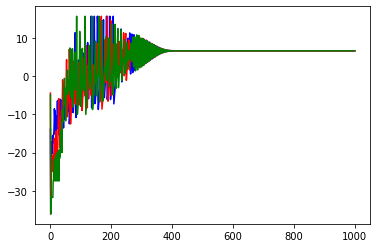

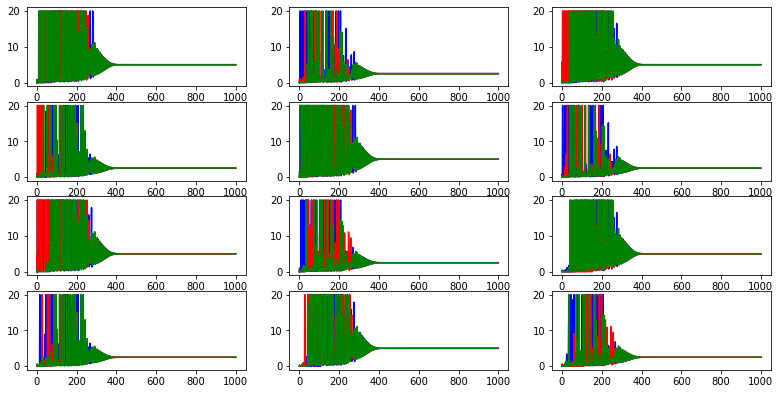

In [ ]:
x = np.linspace(0,1000, 1000)
plt.plot(x,Y[0], color='b', label='1')
plt.plot(x,Y[1], color='r', label='2')
plt.plot(x,Y[2], color='g', label='3')
#plt.plot(x,y[:,0,1,0],y[:,0,1,1],y[:,0,2,0],y[:,0,2,1],y[:,1,2,0],y[:,1,2,1])
f = plt.figure()
f.set_figwidth(20/1.5)
f.set_figheight(10/1.5)
plt.subplot(4, 3, 1,)
plt.plot(x,vx[:,0,0,1,0], color='b', label='1')
plt.plot(x,vx[:,1,0,1,0], color='r', label='2')
plt.plot(x,vx[:,2,0,1,0], color='g', label='3')
plt.subplot(4, 3, 2)
plt.plot(x,vx[:,0,0,1,1], color='b', label='1')
plt.plot(x,vx[:,1,0,1,1], color='r', label='2')
plt.plot(x,vx[:,2,0,1,1], color='g', label='3')

plt.subplot(4, 3, 3)
plt.plot(x,vx[:,0,0,2,0], color='b', label='1')
plt.plot(x,vx[:,1,0,2,0], color='r', label='2')
plt.plot(x,vx[:,2,0,2,0], color='g', label='3')

plt.subplot(4, 3, 4)
plt.plot(x,vx[:,0,0,2,1], color='b', label='1')
plt.plot(x,vx[:,1,0,2,1], color='r', label='2')
plt.plot(x,vx[:,2,0,2,1], color='g', label='3')

plt.subplot(4, 3, 5)
plt.plot(x,vx[:,0,1,0,0], color='b', label='1')
plt.plot(x,vx[:,1,1,0,0], color='r', label='2')
plt.plot(x,vx[:,2,1,0,0], color='g', label='3')


plt.subplot(4, 3, 6)
plt.plot(x,vx[:,0,1,0,1], color='b', label='1')
plt.plot(x,vx[:,1,1,0,1], color='r', label='2')
plt.plot(x,vx[:,2,1,0,1], color='g', label='3')

plt.subplot(4, 3, 7)
plt.plot(x,vx[:,0,1,2,0], color='b', label='1')
plt.plot(x,vx[:,1,1,2,0], color='r', label='2')
plt.plot(x,vx[:,2,1,2,0], color='g', label='3')


plt.subplot(4, 3, 8)
plt.plot(x,vx[:,0,1,2,1], color='b', label='1')
plt.plot(x,vx[:,1,1,2,1], color='r', label='2')
plt.plot(x,vx[:,2,1,2,1], color='g', label='3')


plt.subplot(4, 3, 9)
plt.plot(x,vx[:,0,2,0,0], color='b', label='1')
plt.plot(x,vx[:,1,2,0,0], color='r', label='2')
plt.plot(x,vx[:,2,2,0,0], color='g', label='3')


plt.subplot(4, 3, 10)
plt.plot(x,vx[:,0,2,0,1], color='b', label='1')
plt.plot(x,vx[:,1,2,0,1], color='r', label='2')
plt.plot(x,vx[:,2,2,0,1], color='g', label='3')

plt.subplot(4, 3, 11)
plt.plot(x,vx[:,0,2,1,0], color='b', label='1')
plt.plot(x,vx[:,1,2,1,0], color='r', label='2')
plt.plot(x,vx[:,2,2,1,0], color='g', label='3')


plt.subplot(4, 3, 12)
plt.plot(x,vx[:,0,2,1,1], color='b', label='1')
plt.plot(x,vx[:,1,2,1,1], color='r', label='2')
plt.plot(x,vx[:,2,2,1,1], color='g', label='3')

plt.show()

In [ ]:
m=3
ne=3
xp=2
K=1000
rand= np.random.default_rng(seed=58)
#x = 5*rand.random([m,m,2,1])+5
x = np.zeros([3,3,3,2,1])
d = np.zeros([m,m,1,1])
c = np.zeros([m,m,ne,xp])
c_bal = np.zeros([m,m,ne,xp])
CA = np.array([20,20,20])
path = np.array([[[1,0],[0,1],[0,1]],[[0,1],[1,0],[0,1]],[[0,1],[0,1],[1,0]]])
path_bal = np.array([[[1,0],[0,1],[0,1]],[[0,1],[1,0],[0,-1]],[[0,-1],[0,1],[-1,0]]])
#path_bal = np.array([[[0,1],[1,0],[0,-1]],[[1,0],[0,1],[0,1]],[[0,1],[0,-1],[1,0]]])
lij=rand.random([ne,m,m])
luv =rand.random([ne,ne]).reshape(3,1,1,3,1)
muv =rand.random([ne,ne]).reshape(3,1,1,3,1)
mvu =rand.random([ne,ne]).reshape(3,1,1,3,1)
lpij =rand.random((ne,3,3,2,1))
A = np.array([[1/2,1/4,1/4],[1/2,1/4,1/4],[1/2,1/4,1/4]])

vx =np.zeros([K,ne,3,3,2,1])
vlij=np.zeros([K,ne,m,m])
vluv =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vmuv =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vmvu =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vlpij =np.zeros((K,ne,3,3,2,1))

d0=20
for i in range(m):
  for j in range(m):
    if i!=j :
      d[i,j]=np.array([[d0]])
      if i>j :
        if i+j==1:
          c_bal[i,j]=-path_bal[0]
          c_bal[j,i]=path_bal[0]
        if i+j==2:
          c_bal[i,j]=-path_bal[1]
          c_bal[j,i]=path_bal[1]
        if i+j==3:
          c_bal[i,j]=-path_bal[2]
          c_bal[j,i]=path_bal[2]
      if i+j ==1:
        c[i,j]= path[0]
      elif i+j ==2 :
        c[i,j]=path[1]
      elif i+j ==3 :
        c[i,j]=path[2]
    else:
      #x[i,j]=np.array([[np.nan],[np.nan]])
      d[i,j]=np.array([[np.nan]])
y=[]
Y=[[],[],[]]
for k in range(K):
  alpha=1/((k+2))
  #print(muv-mvu,'\n','---------------')
  for i in range(3):
    for j in range(3):
      vx[k,i]+=A[j,i]*x[i]
      vlpij[k,i]+=A[j,i]*lpij[i]
      vlij[k,i]+=A[j,i]*lij[i]
      vluv[k,i]+=A[j,i]*luv[i]
      vmuv[k,i]+=A[j,i]*muv[i]
      vmvu[k,i]+=A[j,i]*mvu[i]
  for i in range(3):
    x[i]=f_xstar(vlij[k,i],vlpij[k,i],vluv[k,i],vmuv[k,i],vmvu[k,i],d)
    lij[i],lpij[i],luv[i],muv[i],mvu[i]=update(vx[k,i],vlij[k,i],vlpij[k,i],vluv[k,i],vmuv[k,i],vmvu[k,i],alpha)
    Y[i]+=[lagranzh(vx[k,i],d,vlij[k,i],vlpij[k,i],c,c_bal,vluv[k,i],CA)]
  #xstar=f_xstar(lij,lpij,luv,muv,mvu,d)
  #Y+=[lagranzh(xstar,d,lij,lpij,c,c_bal,luv,CA,muv)]
  #print(lij,lagranzh(xstar,d,lij,lpij,c,luv,CA,muv))
  #y+=[xstar]
  #lij,lpij,luv,muv,mvu=update(xstar,lij,lpij,luv,muv,mvu,alpha)
#y = np.array(y)
#Y = np.array(Y)
#y.shape,Y.shape
vx.shape

<ipython-input-48-2a1700468142>:22: RuntimeWarning: divide by zero encountered in log10
  ret =(np.sum(np.log10(x),where=yy))


(1000, 3, 3, 3, 2, 1)

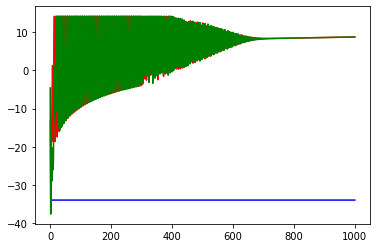

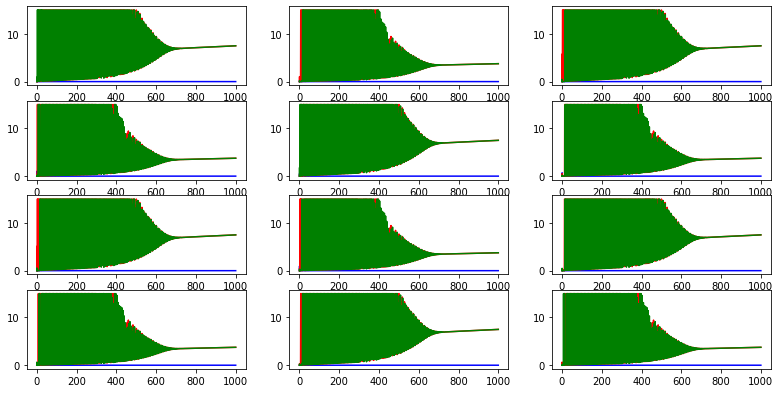

In [ ]:
x = np.linspace(0,1000, 1000)
plt.plot(x,Y[0], color='b', label='1')
plt.plot(x,Y[1], color='r', label='2')
plt.plot(x,Y[2], color='g', label='3')
#plt.plot(x,y[:,0,1,0],y[:,0,1,1],y[:,0,2,0],y[:,0,2,1],y[:,1,2,0],y[:,1,2,1])
f = plt.figure()
f.set_figwidth(20/1.5)
f.set_figheight(10/1.5)
plt.subplot(4, 3, 1,)
plt.plot(x,vx[:,0,0,1,0], color='b', label='1')
plt.plot(x,vx[:,1,0,1,0], color='r', label='2')
plt.plot(x,vx[:,2,0,1,0], color='g', label='3')
plt.subplot(4, 3, 2)
plt.plot(x,vx[:,0,0,1,1], color='b', label='1')
plt.plot(x,vx[:,1,0,1,1], color='r', label='2')
plt.plot(x,vx[:,2,0,1,1], color='g', label='3')

plt.subplot(4, 3, 3)
plt.plot(x,vx[:,0,0,2,0], color='b', label='1')
plt.plot(x,vx[:,1,0,2,0], color='r', label='2')
plt.plot(x,vx[:,2,0,2,0], color='g', label='3')

plt.subplot(4, 3, 4)
plt.plot(x,vx[:,0,0,2,1], color='b', label='1')
plt.plot(x,vx[:,1,0,2,1], color='r', label='2')
plt.plot(x,vx[:,2,0,2,1], color='g', label='3')

plt.subplot(4, 3, 5)
plt.plot(x,vx[:,0,1,0,0], color='b', label='1')
plt.plot(x,vx[:,1,1,0,0], color='r', label='2')
plt.plot(x,vx[:,2,1,0,0], color='g', label='3')


plt.subplot(4, 3, 6)
plt.plot(x,vx[:,0,1,0,1], color='b', label='1')
plt.plot(x,vx[:,1,1,0,1], color='r', label='2')
plt.plot(x,vx[:,2,1,0,1], color='g', label='3')

plt.subplot(4, 3, 7)
plt.plot(x,vx[:,0,1,2,0], color='b', label='1')
plt.plot(x,vx[:,1,1,2,0], color='r', label='2')
plt.plot(x,vx[:,2,1,2,0], color='g', label='3')


plt.subplot(4, 3, 8)
plt.plot(x,vx[:,0,1,2,1], color='b', label='1')
plt.plot(x,vx[:,1,1,2,1], color='r', label='2')
plt.plot(x,vx[:,2,1,2,1], color='g', label='3')


plt.subplot(4, 3, 9)
plt.plot(x,vx[:,0,2,0,0], color='b', label='1')
plt.plot(x,vx[:,1,2,0,0], color='r', label='2')
plt.plot(x,vx[:,2,2,0,0], color='g', label='3')


plt.subplot(4, 3, 10)
plt.plot(x,vx[:,0,2,0,1], color='b', label='1')
plt.plot(x,vx[:,1,2,0,1], color='r', label='2')
plt.plot(x,vx[:,2,2,0,1], color='g', label='3')

plt.subplot(4, 3, 11)
plt.plot(x,vx[:,0,2,1,0], color='b', label='1')
plt.plot(x,vx[:,1,2,1,0], color='r', label='2')
plt.plot(x,vx[:,2,2,1,0], color='g', label='3')


plt.subplot(4, 3, 12)
plt.plot(x,vx[:,0,2,1,1], color='b', label='1')
plt.plot(x,vx[:,1,2,1,1], color='r', label='2')
plt.plot(x,vx[:,2,2,1,1], color='g', label='3')

plt.show()

In [ ]:
m=3
ne=3
xp=2
K=1000
rand= np.random.default_rng(seed=68)
#x = 5*rand.random([m,m,2,1])+5
x = np.zeros([3,3,3,2,1])
d = np.zeros([m,m,1,1])
c = np.zeros([m,m,ne,xp])
c_bal = np.zeros([m,m,ne,xp])
CA = np.array([20,20,20])
path = np.array([[[1,0],[0,1],[0,1]],[[0,1],[1,0],[0,1]],[[0,1],[0,1],[1,0]]])
path_bal = np.array([[[1,0],[0,1],[0,1]],[[0,1],[1,0],[0,-1]],[[0,-1],[0,1],[-1,0]]])
#path_bal = np.array([[[0,1],[1,0],[0,-1]],[[1,0],[0,1],[0,1]],[[0,1],[0,-1],[1,0]]])
lij=rand.random([ne,m,m])
luv =rand.random([ne,ne]).reshape(3,1,1,3,1)
muv =rand.random([ne,ne]).reshape(3,1,1,3,1)
mvu =rand.random([ne,ne]).reshape(3,1,1,3,1)
lpij =rand.random((ne,3,3,2,1))
A1 = np.array([[1/2,1/4,1/4],[1/4,1/2,1/4],[1/4,1/4,1/2]])
A2 = np.array([[1/3,1/3,1/3],[1/3,1/3,1/3],[1/3,1/3,1/3]])
A3 = np.array([[0,1,0],[0,0,1],[1,0,0]])

vx =np.zeros([K,ne,3,3,2,1])
vlij=np.zeros([K,ne,m,m])
vluv =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vmuv =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vmvu =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vlpij =np.zeros((K,ne,3,3,2,1))

d0=20
for i in range(m):
  for j in range(m):
    if i!=j :
      d[i,j]=np.array([[d0]])
      if i>j :
        if i+j==1:
          c_bal[i,j]=-path_bal[0]
          c_bal[j,i]=path_bal[0]
        if i+j==2:
          c_bal[i,j]=-path_bal[1]
          c_bal[j,i]=path_bal[1]
        if i+j==3:
          c_bal[i,j]=-path_bal[2]
          c_bal[j,i]=path_bal[2]
      if i+j ==1:
        c[i,j]= path[0]
      elif i+j ==2 :
        c[i,j]=path[1]
      elif i+j ==3 :
        c[i,j]=path[2]
    else:
      #x[i,j]=np.array([[np.nan],[np.nan]])
      d[i,j]=np.array([[np.nan]])
y=[]
Y=[[],[],[]]
for k in range(K):
  alpha=1/((k+2))
  if k%3==0:
    A=A1
  elif k%3==1:
    A=A2
  elif k%3==2:
    A=A3
  #print(muv-mvu,'\n','---------------')
  for i in range(3):
    for j in range(3):
      vx[k,i]+=A[j,i]*x[i]
      vlpij[k,i]+=A[j,i]*lpij[i]
      vlij[k,i]+=A[j,i]*lij[i]
      vluv[k,i]+=A[j,i]*luv[i]
      vmuv[k,i]+=A[j,i]*muv[i]
      vmvu[k,i]+=A[j,i]*mvu[i]
  for i in range(3):
    x[i]=f_xstar(vlij[k,i],vlpij[k,i],vluv[k,i],vmuv[k,i],vmvu[k,i],d)
    lij[i],lpij[i],luv[i],muv[i],mvu[i]=update(vx[k,i],vlij[k,i],vlpij[k,i],vluv[k,i],vmuv[k,i],vmvu[k,i],alpha)
    Y[i]+=[lagranzh(vx[k,i],d,vlij[k,i],vlpij[k,i],c,c_bal,vluv[k,i],CA)]
  #xstar=f_xstar(lij,lpij,luv,muv,mvu,d)
  #Y+=[lagranzh(xstar,d,lij,lpij,c,c_bal,luv,CA,muv)]
  #print(lij,lagranzh(xstar,d,lij,lpij,c,luv,CA,muv))
  #y+=[xstar]
  #lij,lpij,luv,muv,mvu=update(xstar,lij,lpij,luv,muv,mvu,alpha)
#y = np.array(y)
#Y = np.array(Y)
#y.shape,Y.shape
vx.shape

<ipython-input-48-2a1700468142>:22: RuntimeWarning: divide by zero encountered in log10
  ret =(np.sum(np.log10(x),where=yy))


(1000, 3, 3, 3, 2, 1)

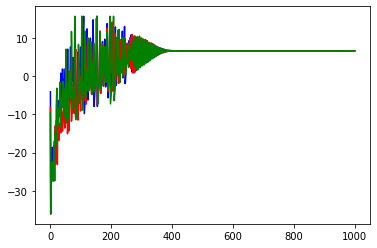

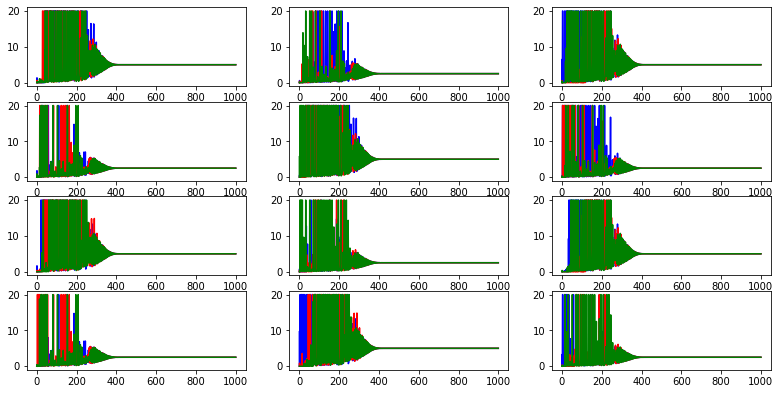

In [ ]:
x = np.linspace(0,1000, 1000)
plt.plot(x,Y[0], color='b', label='1')
plt.plot(x,Y[1], color='r', label='2')
plt.plot(x,Y[2], color='g', label='3')
#plt.plot(x,y[:,0,1,0],y[:,0,1,1],y[:,0,2,0],y[:,0,2,1],y[:,1,2,0],y[:,1,2,1])
f = plt.figure()
f.set_figwidth(20/1.5)
f.set_figheight(10/1.5)
plt.subplot(4, 3, 1,)
plt.plot(x,vx[:,0,0,1,0], color='b', label='1')
plt.plot(x,vx[:,1,0,1,0], color='r', label='2')
plt.plot(x,vx[:,2,0,1,0], color='g', label='3')
plt.subplot(4, 3, 2)
plt.plot(x,vx[:,0,0,1,1], color='b', label='1')
plt.plot(x,vx[:,1,0,1,1], color='r', label='2')
plt.plot(x,vx[:,2,0,1,1], color='g', label='3')

plt.subplot(4, 3, 3)
plt.plot(x,vx[:,0,0,2,0], color='b', label='1')
plt.plot(x,vx[:,1,0,2,0], color='r', label='2')
plt.plot(x,vx[:,2,0,2,0], color='g', label='3')

plt.subplot(4, 3, 4)
plt.plot(x,vx[:,0,0,2,1], color='b', label='1')
plt.plot(x,vx[:,1,0,2,1], color='r', label='2')
plt.plot(x,vx[:,2,0,2,1], color='g', label='3')

plt.subplot(4, 3, 5)
plt.plot(x,vx[:,0,1,0,0], color='b', label='1')
plt.plot(x,vx[:,1,1,0,0], color='r', label='2')
plt.plot(x,vx[:,2,1,0,0], color='g', label='3')


plt.subplot(4, 3, 6)
plt.plot(x,vx[:,0,1,0,1], color='b', label='1')
plt.plot(x,vx[:,1,1,0,1], color='r', label='2')
plt.plot(x,vx[:,2,1,0,1], color='g', label='3')

plt.subplot(4, 3, 7)
plt.plot(x,vx[:,0,1,2,0], color='b', label='1')
plt.plot(x,vx[:,1,1,2,0], color='r', label='2')
plt.plot(x,vx[:,2,1,2,0], color='g', label='3')


plt.subplot(4, 3, 8)
plt.plot(x,vx[:,0,1,2,1], color='b', label='1')
plt.plot(x,vx[:,1,1,2,1], color='r', label='2')
plt.plot(x,vx[:,2,1,2,1], color='g', label='3')


plt.subplot(4, 3, 9)
plt.plot(x,vx[:,0,2,0,0], color='b', label='1')
plt.plot(x,vx[:,1,2,0,0], color='r', label='2')
plt.plot(x,vx[:,2,2,0,0], color='g', label='3')


plt.subplot(4, 3, 10)
plt.plot(x,vx[:,0,2,0,1], color='b', label='1')
plt.plot(x,vx[:,1,2,0,1], color='r', label='2')
plt.plot(x,vx[:,2,2,0,1], color='g', label='3')

plt.subplot(4, 3, 11)
plt.plot(x,vx[:,0,2,1,0], color='b', label='1')
plt.plot(x,vx[:,1,2,1,0], color='r', label='2')
plt.plot(x,vx[:,2,2,1,0], color='g', label='3')


plt.subplot(4, 3, 12)
plt.plot(x,vx[:,0,2,1,1], color='b', label='1')
plt.plot(x,vx[:,1,2,1,1], color='r', label='2')
plt.plot(x,vx[:,2,2,1,1], color='g', label='3')

plt.show()

In [ ]:
m=3
ne=3
xp=2
K=1000
rand= np.random.default_rng(seed=38)
#x = 5*rand.random([m,m,2,1])+5
x = np.zeros([3,3,3,2,1])
d = np.zeros([m,m,1,1])
c = np.zeros([m,m,ne,xp])
c_bal = np.zeros([m,m,ne,xp])
CA = np.array([20,20,20])
path = np.array([[[1,0],[0,1],[0,1]],[[0,1],[1,0],[0,1]],[[0,1],[0,1],[1,0]]])
path_bal = np.array([[[1,0],[0,1],[0,1]],[[0,1],[1,0],[0,-1]],[[0,-1],[0,1],[-1,0]]])
#path_bal = np.array([[[0,1],[1,0],[0,-1]],[[1,0],[0,1],[0,1]],[[0,1],[0,-1],[1,0]]])
lij=rand.random([ne,m,m])
luv =rand.random([ne,ne]).reshape(3,1,1,3,1)
muv =rand.random([ne,ne]).reshape(3,1,1,3,1)
mvu =rand.random([ne,ne]).reshape(3,1,1,3,1)
lpij =rand.random((ne,3,3,2,1))
A1 = np.array([[1/2,1/2,0],[1/2,1/2,0],[0,0,1]])
A2 = np.array([[1/2,0,1/2],[0,1,0],[1/2,0,1/2]])
A3 = np.array([[1,0,0],[0,1/2,1/2],[0,1/2,1/2]])

vx =np.zeros([K,ne,3,3,2,1])
vlij=np.zeros([K,ne,m,m])
vluv =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vmuv =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vmvu =np.zeros([K,ne,ne]).reshape(K,ne,1,1,3,1)
vlpij =np.zeros((K,ne,3,3,2,1))

d0=20
for i in range(m):
  for j in range(m):
    if i!=j :
      d[i,j]=np.array([[d0]])
      if i>j :
        if i+j==1:
          c_bal[i,j]=-path_bal[0]
          c_bal[j,i]=path_bal[0]
        if i+j==2:
          c_bal[i,j]=-path_bal[1]
          c_bal[j,i]=path_bal[1]
        if i+j==3:
          c_bal[i,j]=-path_bal[2]
          c_bal[j,i]=path_bal[2]
      if i+j ==1:
        c[i,j]= path[0]
      elif i+j ==2 :
        c[i,j]=path[1]
      elif i+j ==3 :
        c[i,j]=path[2]
    else:
      #x[i,j]=np.array([[np.nan],[np.nan]])
      d[i,j]=np.array([[np.nan]])
y=[]
Y=[[],[],[]]
for k in range(K):
  alpha=1/((k+2))
  if k%3==0:
    A=A1
  elif k%3==1:
    A=A2
  elif k%3==2:
    A=A3
  #print(muv-mvu,'\n','---------------')
  for i in range(3):
    for j in range(3):
      vx[k,i]+=A[j,i]*x[i]
      vlpij[k,i]+=A[j,i]*lpij[i]
      vlij[k,i]+=A[j,i]*lij[i]
      vluv[k,i]+=A[j,i]*luv[i]
      vmuv[k,i]+=A[j,i]*muv[i]
      vmvu[k,i]+=A[j,i]*mvu[i]
  for i in range(3):
    x[i]=f_xstar(vlij[k,i],vlpij[k,i],vluv[k,i],vmuv[k,i],vmvu[k,i],d)
    lij[i],lpij[i],luv[i],muv[i],mvu[i]=update(vx[k,i],vlij[k,i],vlpij[k,i],vluv[k,i],vmuv[k,i],vmvu[k,i],alpha)
    Y[i]+=[lagranzh(vx[k,i],d,vlij[k,i],vlpij[k,i],c,c_bal,vluv[k,i],CA)]
  #xstar=f_xstar(lij,lpij,luv,muv,mvu,d)
  #Y+=[lagranzh(xstar,d,lij,lpij,c,c_bal,luv,CA,muv)]
  #print(lij,lagranzh(xstar,d,lij,lpij,c,luv,CA,muv))
  #y+=[xstar]
  #lij,lpij,luv,muv,mvu=update(xstar,lij,lpij,luv,muv,mvu,alpha)
#y = np.array(y)
#Y = np.array(Y)
#y.shape,Y.shape
vx.shape

<ipython-input-48-2a1700468142>:22: RuntimeWarning: divide by zero encountered in log10
  ret =(np.sum(np.log10(x),where=yy))


(1000, 3, 3, 3, 2, 1)

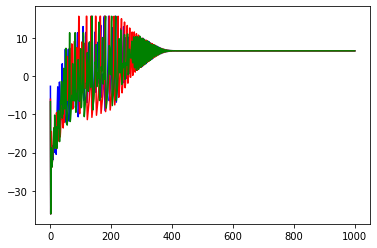

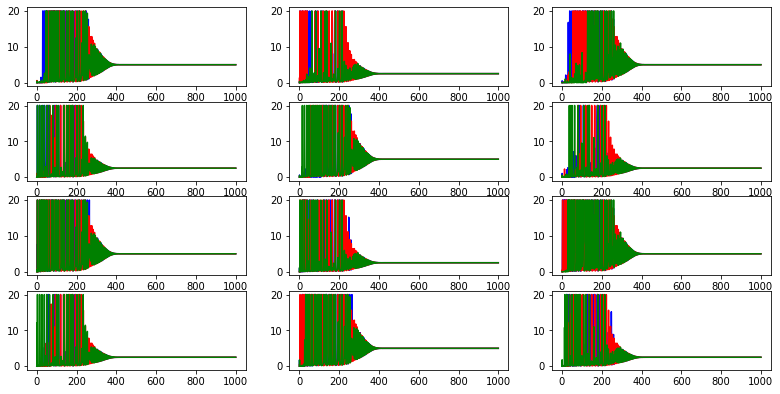

In [ ]:
x = np.linspace(0,1000, 1000)
plt.plot(x,Y[0], color='b', label='1')
plt.plot(x,Y[1], color='r', label='2')
plt.plot(x,Y[2], color='g', label='3')
#plt.plot(x,y[:,0,1,0],y[:,0,1,1],y[:,0,2,0],y[:,0,2,1],y[:,1,2,0],y[:,1,2,1])
f = plt.figure()
f.set_figwidth(20/1.5)
f.set_figheight(10/1.5)
plt.subplot(4, 3, 1,)
plt.plot(x,vx[:,0,0,1,0], color='b', label='1')
plt.plot(x,vx[:,1,0,1,0], color='r', label='2')
plt.plot(x,vx[:,2,0,1,0], color='g', label='3')
plt.subplot(4, 3, 2)
plt.plot(x,vx[:,0,0,1,1], color='b', label='1')
plt.plot(x,vx[:,1,0,1,1], color='r', label='2')
plt.plot(x,vx[:,2,0,1,1], color='g', label='3')

plt.subplot(4, 3, 3)
plt.plot(x,vx[:,0,0,2,0], color='b', label='1')
plt.plot(x,vx[:,1,0,2,0], color='r', label='2')
plt.plot(x,vx[:,2,0,2,0], color='g', label='3')

plt.subplot(4, 3, 4)
plt.plot(x,vx[:,0,0,2,1], color='b', label='1')
plt.plot(x,vx[:,1,0,2,1], color='r', label='2')
plt.plot(x,vx[:,2,0,2,1], color='g', label='3')

plt.subplot(4, 3, 5)
plt.plot(x,vx[:,0,1,0,0], color='b', label='1')
plt.plot(x,vx[:,1,1,0,0], color='r', label='2')
plt.plot(x,vx[:,2,1,0,0], color='g', label='3')


plt.subplot(4, 3, 6)
plt.plot(x,vx[:,0,1,0,1], color='b', label='1')
plt.plot(x,vx[:,1,1,0,1], color='r', label='2')
plt.plot(x,vx[:,2,1,0,1], color='g', label='3')

plt.subplot(4, 3, 7)
plt.plot(x,vx[:,0,1,2,0], color='b', label='1')
plt.plot(x,vx[:,1,1,2,0], color='r', label='2')
plt.plot(x,vx[:,2,1,2,0], color='g', label='3')


plt.subplot(4, 3, 8)
plt.plot(x,vx[:,0,1,2,1], color='b', label='1')
plt.plot(x,vx[:,1,1,2,1], color='r', label='2')
plt.plot(x,vx[:,2,1,2,1], color='g', label='3')


plt.subplot(4, 3, 9)
plt.plot(x,vx[:,0,2,0,0], color='b', label='1')
plt.plot(x,vx[:,1,2,0,0], color='r', label='2')
plt.plot(x,vx[:,2,2,0,0], color='g', label='3')


plt.subplot(4, 3, 10)
plt.plot(x,vx[:,0,2,0,1], color='b', label='1')
plt.plot(x,vx[:,1,2,0,1], color='r', label='2')
plt.plot(x,vx[:,2,2,0,1], color='g', label='3')

plt.subplot(4, 3, 11)
plt.plot(x,vx[:,0,2,1,0], color='b', label='1')
plt.plot(x,vx[:,1,2,1,0], color='r', label='2')
plt.plot(x,vx[:,2,2,1,0], color='g', label='3')


plt.subplot(4, 3, 12)
plt.plot(x,vx[:,0,2,1,1], color='b', label='1')
plt.plot(x,vx[:,1,2,1,1], color='r', label='2')
plt.plot(x,vx[:,2,2,1,1], color='g', label='3')

plt.show()